In [2]:
import numpy as np
import pandas as pd
import cv2 as cv

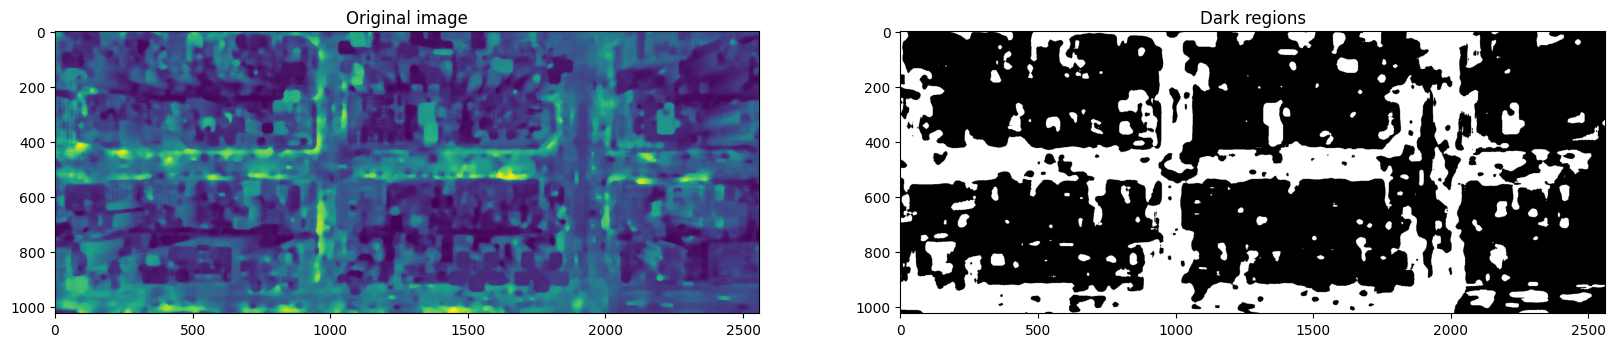

In [4]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.morphology import binary_opening, disk


# загрузка изображения
img1 = plt.imread(r'C:\Users\loinos\Desktop\референсы города освещение\2.jpg')
img  = cv.medianBlur(img1,21)
# перевод в изображение в оттенки серого
gray_img = rgb2gray(img)

# применение морфологической обработки для удаления шума и объединения близких областей
opened_img = binary_opening(gray_img < threshold_otsu(gray_img), disk(1))

# создание маски, которая выделяет темные области
dark_mask = opened_img == 0

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
ret, thresh = cv.threshold(imgray, 127, 255, cv.THRESH_TOZERO)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours,-1,(0,255,0),3) 

#print(contours)

# отображение результата
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(imgray)
ax[0].set_title('Original image')
ax[1].imshow(dark_mask, cmap='gray')
ax[1].set_title('Dark regions')
plt.show()

[[0.8626998  0.62853902]
 [0.87001102 0.61172561]
 [0.39431464 0.28920975]
 [0.33491381 0.05924059]
 [0.20236127 0.13211057]
 [0.26556357 0.28479687]
 [0.94435514 0.12057581]
 [0.62776979 0.0694542 ]
 [0.03817186 0.57701253]
 [0.11534067 0.10855527]]


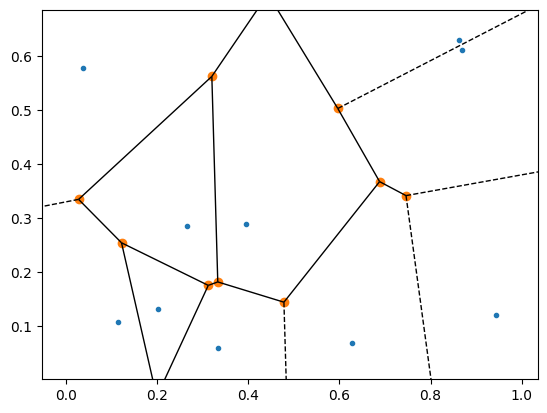

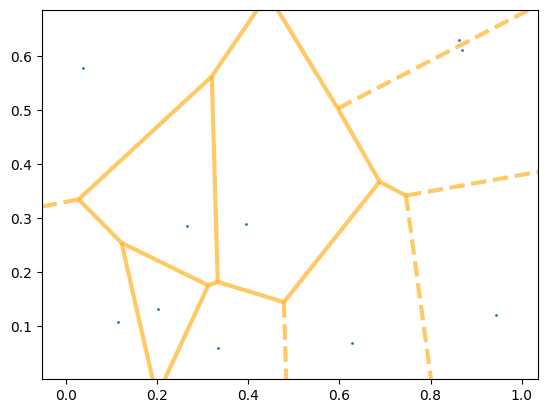

In [9]:
points = np.random.rand(10,2) #random
print(points)
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
line_width=3, line_alpha=0.6, point_size=2)
plt.show()

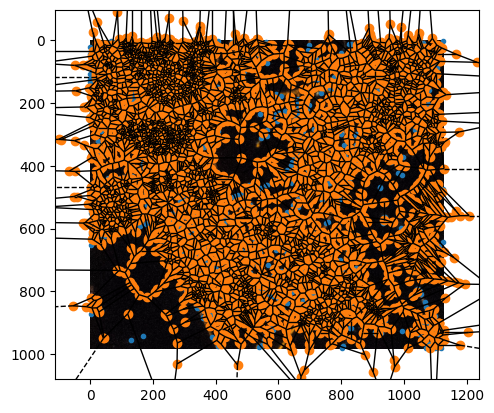

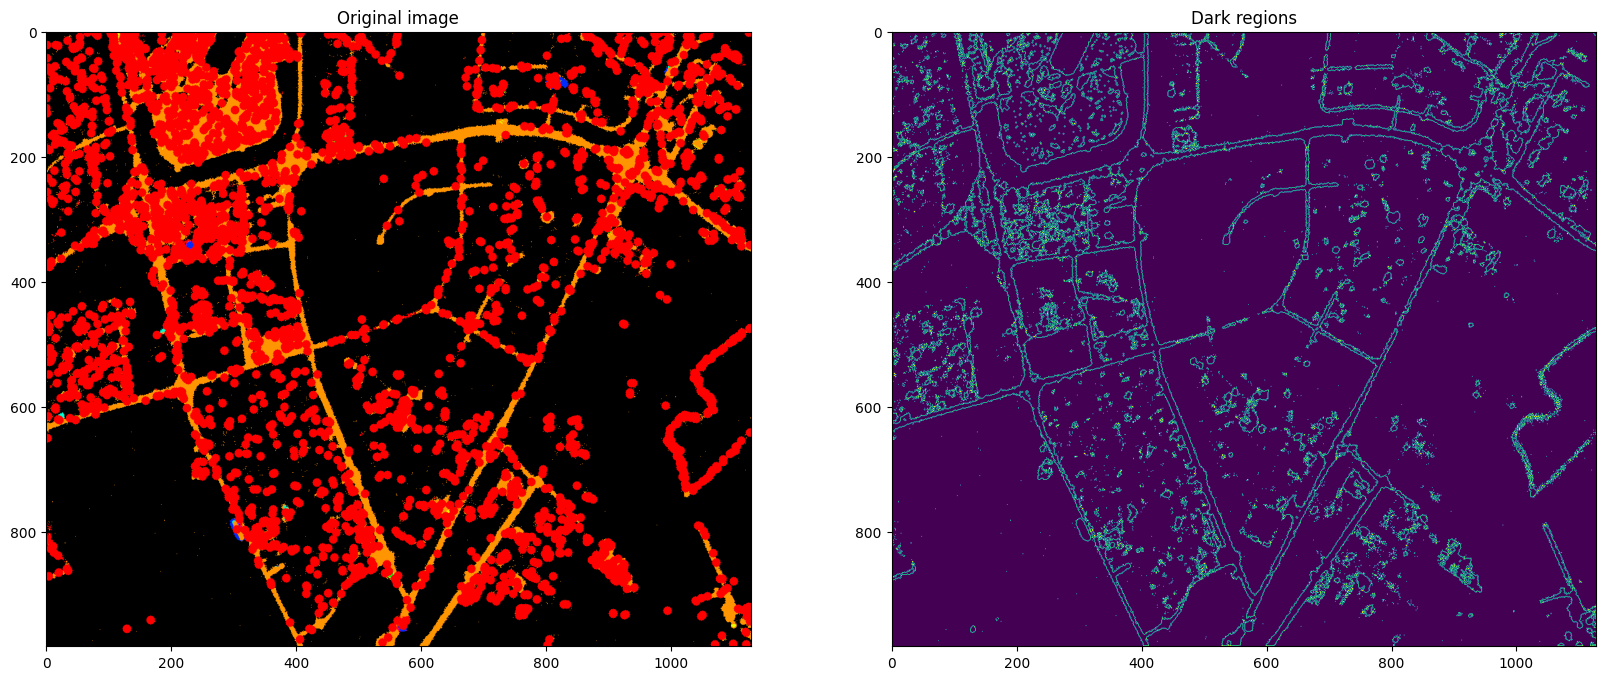

In [10]:

my_photohel = my_photo.copy()


img_grey = cv.cvtColor(my_photohel,cv.COLOR_BGR2GRAY)

#set a thresh
thresh = 100

#get threshold image
ret,thresh_img = cv.threshold(img_grey, thresh, 255, cv.THRESH_TOZERO)

#find contours
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img_contours = np.uint8(np.zeros((my_photohel.shape[0],my_photohel.shape[1])))

cv.drawContours(img_contours, contours, -1, (255,255,255), 1)

points = []

for i in contours:
    M = cv.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        points.append([cx,cy])
        cv.circle(my_photohel, (cx, cy), 7, (255, 0, 0), -1)


my_photohel2 = plt.imread(r'C:\Users\loinos\Desktop\референсы города освещение\10.jpg')
# imd = cv.add(my_photo1,fig)




vor = Voronoi(points)

fig = voronoi_plot_2d(vor)
# imd = cv.add(my_photo1,fig)
plt.gca().invert_yaxis()
plt.imshow(my_photohel2)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(my_photohel)
ax[0]
ax[0].set_title('Original image')
ax[1].imshow(img_contours)
ax[1].set_title('Dark regions')
plt.show()


In [6]:
def hsvToRGB(h, s, v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

def rgbToHSV(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

1109952


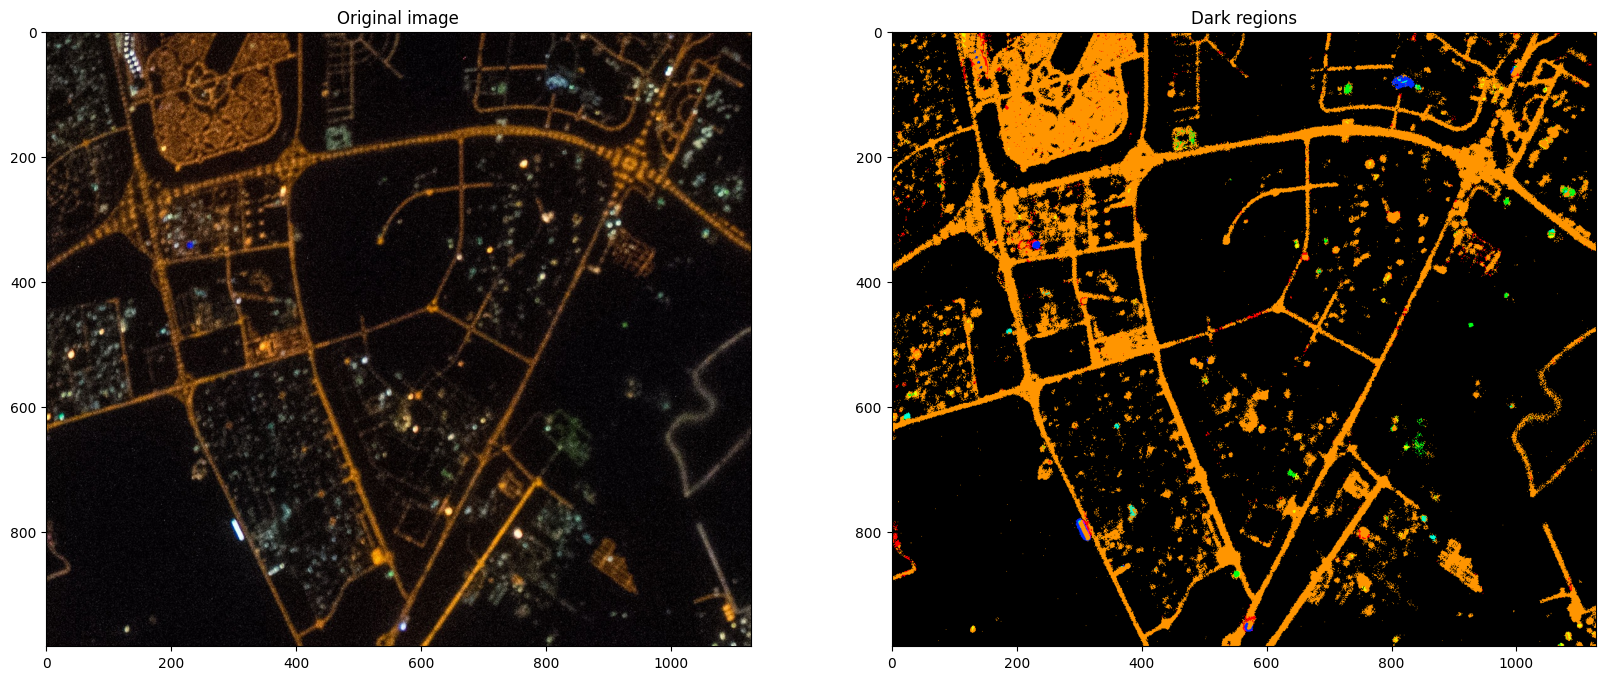

In [7]:
import colorsys
my_photo1 = plt.imread(r'C:\Users\loinos\Desktop\референсы города освещение\10.jpg')


my_photo = my_photo1.copy()
print( my_photo.shape[0]*my_photo.shape[1])
for i in range(0, my_photo.shape[0]): # We go over rows number 
    for j in range(0, my_photo.shape[1]):
        hc = rgbToHSV(my_photo[i,j][0],my_photo[i,j][1],my_photo[i,j][2])
        hcv = [hc[0],hc[1],hc[2]]
        if ((hcv[0]>310 and hcv[0]<=359) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(0,100,100)
            my_photo[i,j] = [255,0,0]         
        elif ((hcv[0]>270 and hcv[0]<=310) and hcv[1]>25 and hcv[2]>25):
            # hcv1 = colorsys.hsv_to_rgb(290,100,100)
            my_photo[i,j] = [213,0,255]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>190 and hcv[0]<=270) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(230,100,100)
            my_photo[i,j] = [0,43,255]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>150 and hcv[0]<=190) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(170,100,100)
            my_photo[i,j] = [0,255,213]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>80 and hcv[0]<=150) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(125,100,100)
            my_photo[i,j] = [0,255,21]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>50 and hcv[0]<=80) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(65,100,100)
            my_photo[i,j] = [235,255,0]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>20 and hcv[0]<=50) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(35,100,100)
            my_photo[i,j] = [255,149,0]#[hcv1[0],hcv1[1],hcv1[2]]
        elif ((hcv[0]>0 and hcv[0]<=20) and hcv[1]>25 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(0,100,100)
            my_photo[i,j] = [255,0,0]#[hcv1[0],hcv1[1],hcv1[2]]
        elif (hcv[1]<=40 and hcv[2]>25):
            # hcv1=colorsys.hsv_to_rgb(60,0,60)
            my_photo[i,j] = [255,149,0]#[154,154,154]#[hcv1[0],hcv1[1],hcv1[2]]
        else :#(hcv[2]<=40):
            # hcv1=colorsys.hsv_to_rgb(120,0,0)
            my_photo[i,j] = [0,0,0]#[hcv1[0],hcv1[1],hcv1[2]]


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(my_photo1)
ax[0].set_title('Original image')
ax[1].imshow(my_photo)
ax[1].set_title('Dark regions')
plt.show()
        
        

Text(0.5, 1.0, 'Dark regions')

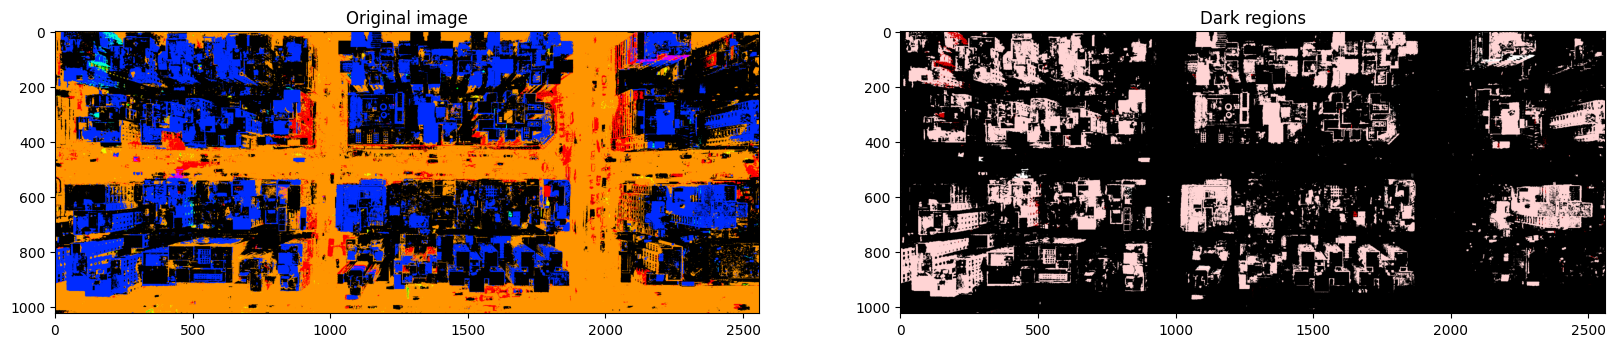

In [66]:
hsv2 = cv.cvtColor(my_photo, cv.COLOR_HSV2RGB )
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(my_photo)
ax[0].set_title('Original image')
ax[1].imshow(hsv2)
ax[1].set_title('Dark regions')

In [ ]:
print(rgbToHSV(255,0,0))

In [1]:
import numpy as np
from scipy.spatial import Delaunay
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
print(points)
tri = Delaunay([points])
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

: 

: 